In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smagnan/1-million-reddit-comments-from-40-subreddits")

print("Path to dataset files:", path)

100%|██████████| 71.2M/71.2M [00:00<00:00, 89.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/smagnan/1-million-reddit-comments-from-40-subreddits/versions/1


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/archive (8).zip')

# Display the first few rows
print(df.head())


       subreddit                                               body  \
0  gameofthrones  Your submission has been automatically removed...   
1            aww  Dont squeeze her with you massive hand, you me...   
2         gaming  It's pretty well known and it was a paid produ...   
3           news  You know we have laws against that currently c...   
4       politics  Yes, there is a difference between gentle supp...   

   controversiality  score  
0                 0      1  
1                 0     19  
2                 0      3  
3                 0     10  
4                 0      1  


In [ ]:
import re

def preprocess_text(text):
    """Clean and preprocess text data."""
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize by splitting on whitespace
    tokens = text.split()
    return tokens

# Apply preprocessing to the 'body' column
df['tokens'] = df['body'].apply(preprocess_text)

# Display the first few rows with tokens
print(df[['body', 'tokens']].head())


                                                body  \
0  Your submission has been automatically removed...   
1  Dont squeeze her with you massive hand, you me...   
2  It's pretty well known and it was a paid produ...   
3  You know we have laws against that currently c...   
4  Yes, there is a difference between gentle supp...   

                                              tokens  
0  [your, submission, has, been, automatically, r...  
1  [dont, squeeze, her, with, you, massive, hand,...  
2  [its, pretty, well, known, and, it, was, a, pa...  
3  [you, know, we, have, laws, against, that, cur...  
4  [yes, there, is, a, difference, between, gentl...  


In [ ]:
# Save the preprocessed data
df.to_csv('reddit_comments_cleaned.csv', index=False)


In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('reddit_comments_cleaned.csv')

# Ensure tokens are stored as lists (if they were saved as strings)
df['tokens'] = df['tokens'].apply(eval)

# Display the first few rows
print(df.head())


       subreddit                                               body  \
0  gameofthrones  Your submission has been automatically removed...   
1            aww  Dont squeeze her with you massive hand, you me...   
2         gaming  It's pretty well known and it was a paid produ...   
3           news  You know we have laws against that currently c...   
4       politics  Yes, there is a difference between gentle supp...   

   controversiality  score                                             tokens  
0                 0      1  [your, submission, has, been, automatically, r...  
1                 0     19  [dont, squeeze, her, with, you, massive, hand,...  
2                 0      3  [its, pretty, well, known, and, it, was, a, pa...  
3                 0     10  [you, know, we, have, laws, against, that, cur...  
4                 0      1  [yes, there, is, a, difference, between, gentl...  


In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
from gensim.models import Word2Vec

# Prepare data: Extract tokenized sentences
sentences = df['tokens'].tolist()

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Save the trained model
model.save("word2vec_reddit.model")


In [ ]:
# Load the trained model
model = Word2Vec.load("word2vec_reddit.model")

# Find words most similar to "movie"
similar_words = model.wv.most_similar("movie", topn=10)
print(similar_words)


[('film', 0.9217246770858765), ('movies', 0.7563539147377014), ('trilogy', 0.7375744581222534), ('scene', 0.7365093231201172), ('trailer', 0.7305415272712708), ('mcu', 0.7214891910552979), ('sequel', 0.7197490334510803), ('endgame', 0.7120562195777893), ('episode', 0.6992728114128113), ('series', 0.6966227293014526)]


In [ ]:
similarity_score = model.wv.similarity("movie", "film")
print(f"Similarity between 'movie' and 'film': {similarity_score:.4f}")


Similarity between 'movie' and 'film': 0.9217


In [ ]:
!pip install matplotlib scikit-learn


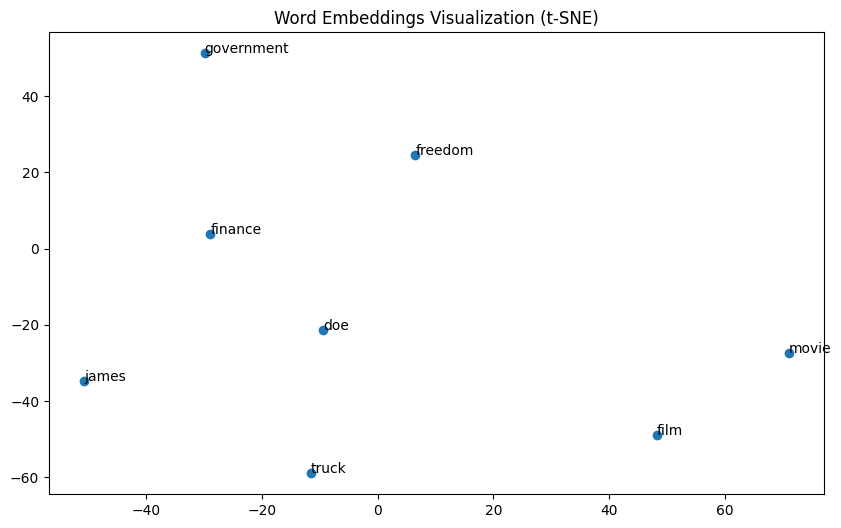

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Load the trained Word2Vec model
from gensim.models import Word2Vec
model = Word2Vec.load("word2vec_reddit.model")

# Select words for visualization
words = ["movie", "film", "truck", "doe", "james", "finance", "government", "freedom"]

# Filter out words that are not in the model vocabulary
valid_words = [word for word in words if word in model.wv]

if len(valid_words) < 2:
    raise ValueError("Not enough words in vocabulary for t-SNE visualization.")

# Extract vectors for valid words
word_vectors = np.array([model.wv[word] for word in valid_words])

# Dynamically adjust perplexity
perplexity_value = min(5, len(word_vectors) - 1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
vectors_2d = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(valid_words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Word Embeddings Visualization (t-SNE)")
plt.show()


In [ ]:
word = "female"
similar_words = model.wv.most_similar(word, topn=10)
print(f"Top 10 words similar to '{word}':")
for w, score in similar_words:
    print(f"{w}: {score:.4f}")


Top 10 words similar to 'female':
male: 0.8829
biologically: 0.6804
heterosexual: 0.6763
empowerment: 0.6679
trans: 0.6649
cis: 0.6474
intersex: 0.6136
homosexual: 0.6096
gender: 0.6084
females: 0.6076


In [ ]:
word1 = "movie"
word2 = "film"
similarity = model.wv.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")


Similarity between 'movie' and 'film': 0.9217


In [ ]:
odd_word = model.wv.doesnt_match(["car", "truck", "motorcycle", "banana"])
print(f"Odd word out: {odd_word}")


Odd word out: banana
